In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# get doi-refnum dict from vispd
vispd = pd.read_csv("../data/raw/vispubdata.csv")
dois = vispd.loc[:, "DOI"].tolist()
ref_num_vispd = vispd.loc[:, "PubsCited"].tolist()
doi_vispd_ref_dict = dict(zip(dois, ref_num_vispd))

In [42]:
# get dois in match
match = pd.read_csv("../data/interim/vispd_openalex_match_2.csv")
oa_dois = match.DOI.tolist()
oa_ref_num = match['Number of References'].tolist()
doi_oa_ref_dict = dict(zip(oa_dois, oa_ref_num))

In [46]:
# total number of references on vispd
np.nansum(ref_num_vispd)

100313.0

In [47]:
# total number of references on openalex
np.nansum(oa_ref_num)

91449.0

In [12]:
# number of references in vispd for papers in match
vispd_ref_num_oa_dois = [doi_vispd_ref_dict[doi] for doi in oa_dois]

In [13]:
# checking whether the two are the same
len(vispd_ref_num_oa_dois) == len(oa_ref_num)

True

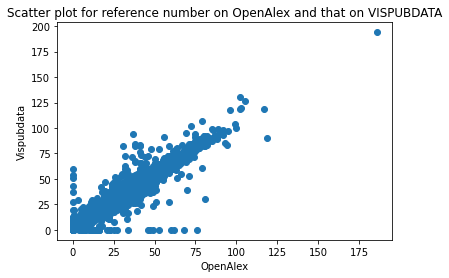

In [17]:
# plot the scatter plot
plt.scatter(oa_ref_num, vispd_ref_num_oa_dois)
plt.title("Scatter plot for reference number on OpenAlex and that on VISPUBDATA")
plt.xlabel("OpenAlex")
plt.ylabel("Vispubdata")
plt.show()

In [24]:
# the difference between refnum on vispd and that on openalex
# it surprised me that for some papers, openalex has more references than vispd
diff_list = (vispd_ref_num_oa_dois - oa_ref_num).tolist()

<AxesSubplot:ylabel='Density'>

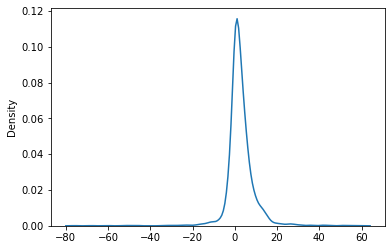

In [27]:
# kernel density. 
sns.kdeplot(diff_list)

Text(0.5, 1.0, 'Histogram of the difference between reference number on VISPUBDATA and that on OpenAlex')

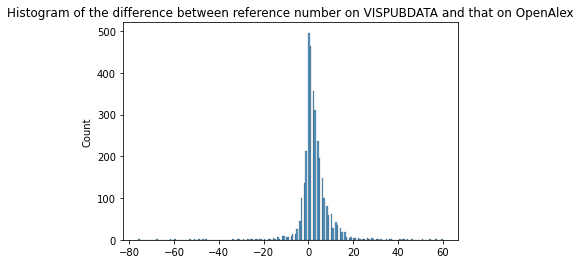

In [39]:
# histogram
sns.histplot(diff_list)
plt.title("Histogram of the difference between reference number on VISPUBDATA and that on OpenAlex")

In [33]:
positive_diff_list = [i for i in diff_list if i > 0]

In [34]:
len(positive_diff_list)

2252

In [36]:
sum(positive_diff_list)

11558.0

In [37]:
negative_diff_list = [i for i in diff_list if i < 0]

In [38]:
sum(negative_diff_list)

-2823.0